In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train_cleaned.csv')

In [4]:
df

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,avg_default,avg_bill_amt,avg_pay_amt,bill_bal_ratio,pay_bal_ratio
0,360000,0,2,2,25,0,0,0,0,0,0,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,0.000000,8557.666667,9574.666667,0.023771,0.026596
1,240000,0,1,2,46,2,2,0,0,0,0,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0.666667,1107.333333,1263.500000,0.004614,0.005265
2,320000,0,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,0.000000,41459.666667,2750.000000,0.129561,0.008594
3,50000,0,2,2,24,0,0,0,0,0,0,2675,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,445.833333,0.000000,0.008917,0.000000
4,80000,1,3,1,52,0,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,0.000000,22841.000000,1308.833333,0.285513,0.016360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,50000,0,2,2,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166667,0.000000,0.000000,0.000000,0.000000
20996,80000,0,2,1,37,0,0,0,0,0,0,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0,0.000000,55198.500000,3000.000000,0.689981,0.037500
20997,100000,1,1,1,52,1,2,2,2,0,0,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1,1.166667,25024.000000,2100.000000,0.250240,0.021000
20998,90000,0,2,1,47,0,0,0,0,0,0,28477,28718,28847,28747,29177,29452,2000,2000,2000,2000,2000,2000,0,0.000000,28903.000000,2000.000000,0.321144,0.022222


# Split the Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('default',axis=1)
y = df['default']

In [7]:
X_fulltrain, X_test, y_fulltrain,y_test = train_test_split(X,y,test_size=0.2)
X_train, X_val, y_train,y_val = train_test_split(X_fulltrain,y_fulltrain,test_size=0.25)

In [8]:
X_train.reset_index(inplace=True,drop=True)
X_val.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

# Further Analysis

### Scatterplot of feature against target

In [9]:
numerical = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'avg_bill_amt', 'avg_pay_amt', 'bill_bal_ratio','pay_bal_ratio']
categorical=['sex', 'education', 'marriage','pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6','avg_pay_amt']

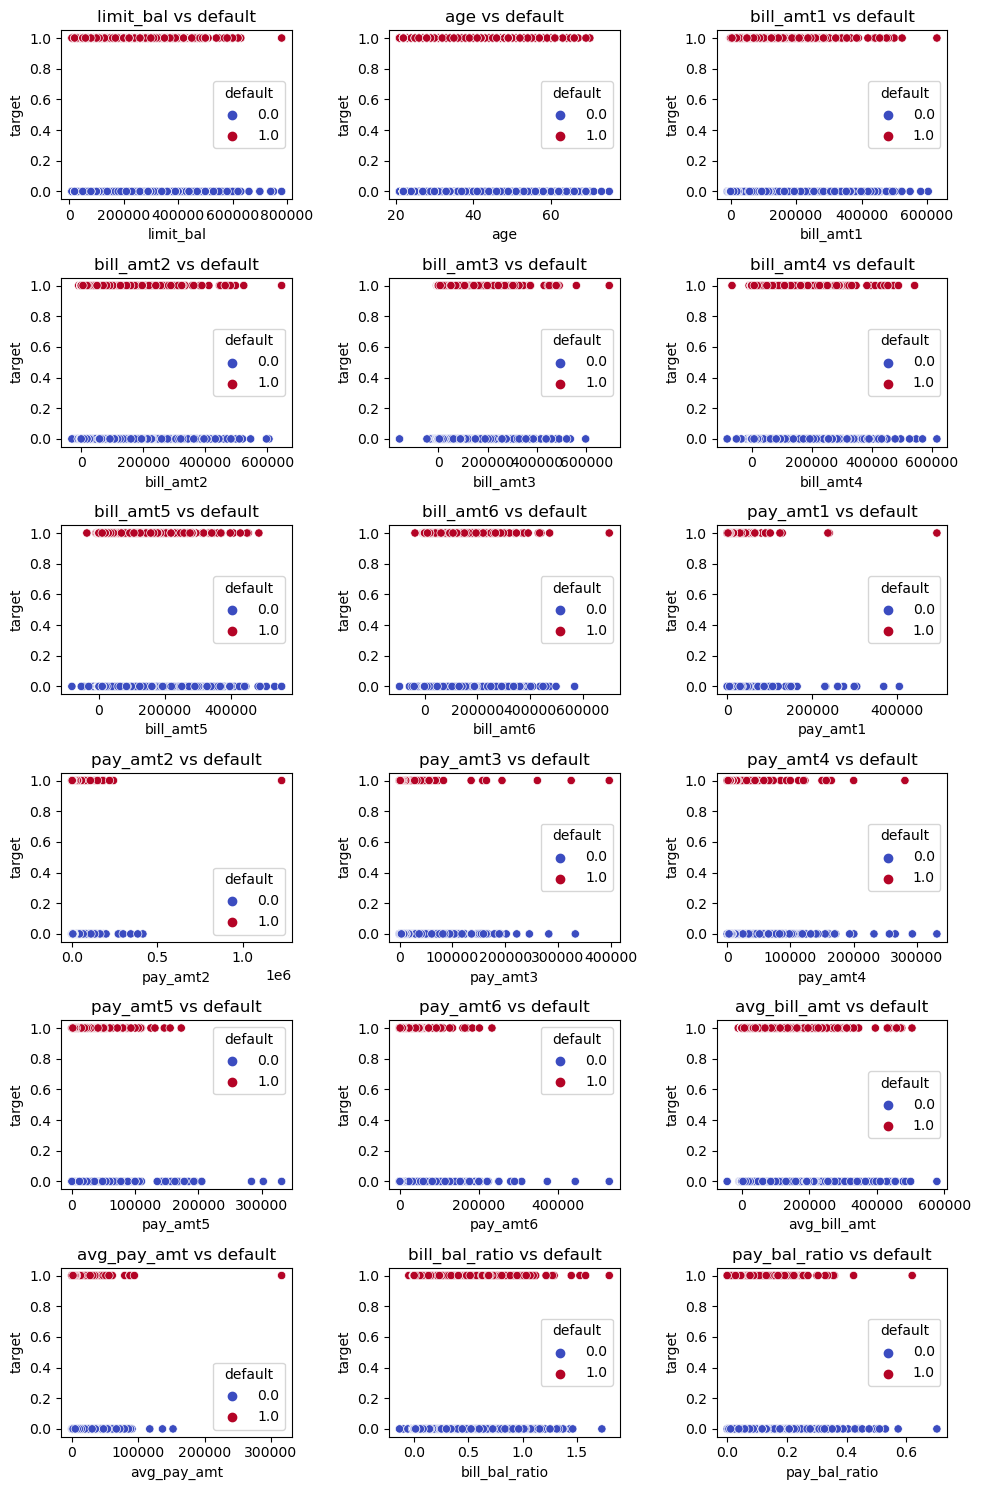

In [10]:
# create a grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 15))

# plot each scatterplot on a subplot
for i, ax in enumerate(axes.flat):
    if i < 18:
        sns.scatterplot(data=X_train, x=numerical[i], y=y_train, hue=y_train, ax=ax,palette='coolwarm')
        ax.set_xlabel(numerical[i])
        ax.set_ylabel('target')
        ax.set_title('{} vs default'.format(numerical[i]))

plt.tight_layout()
plt.show()


Scatterplot probabyly might be not the most effective way to gain insight into the relationship between the features and the target, but we got some insight like the on who got credit limit 700000 and more tend to not default.

### Barplot

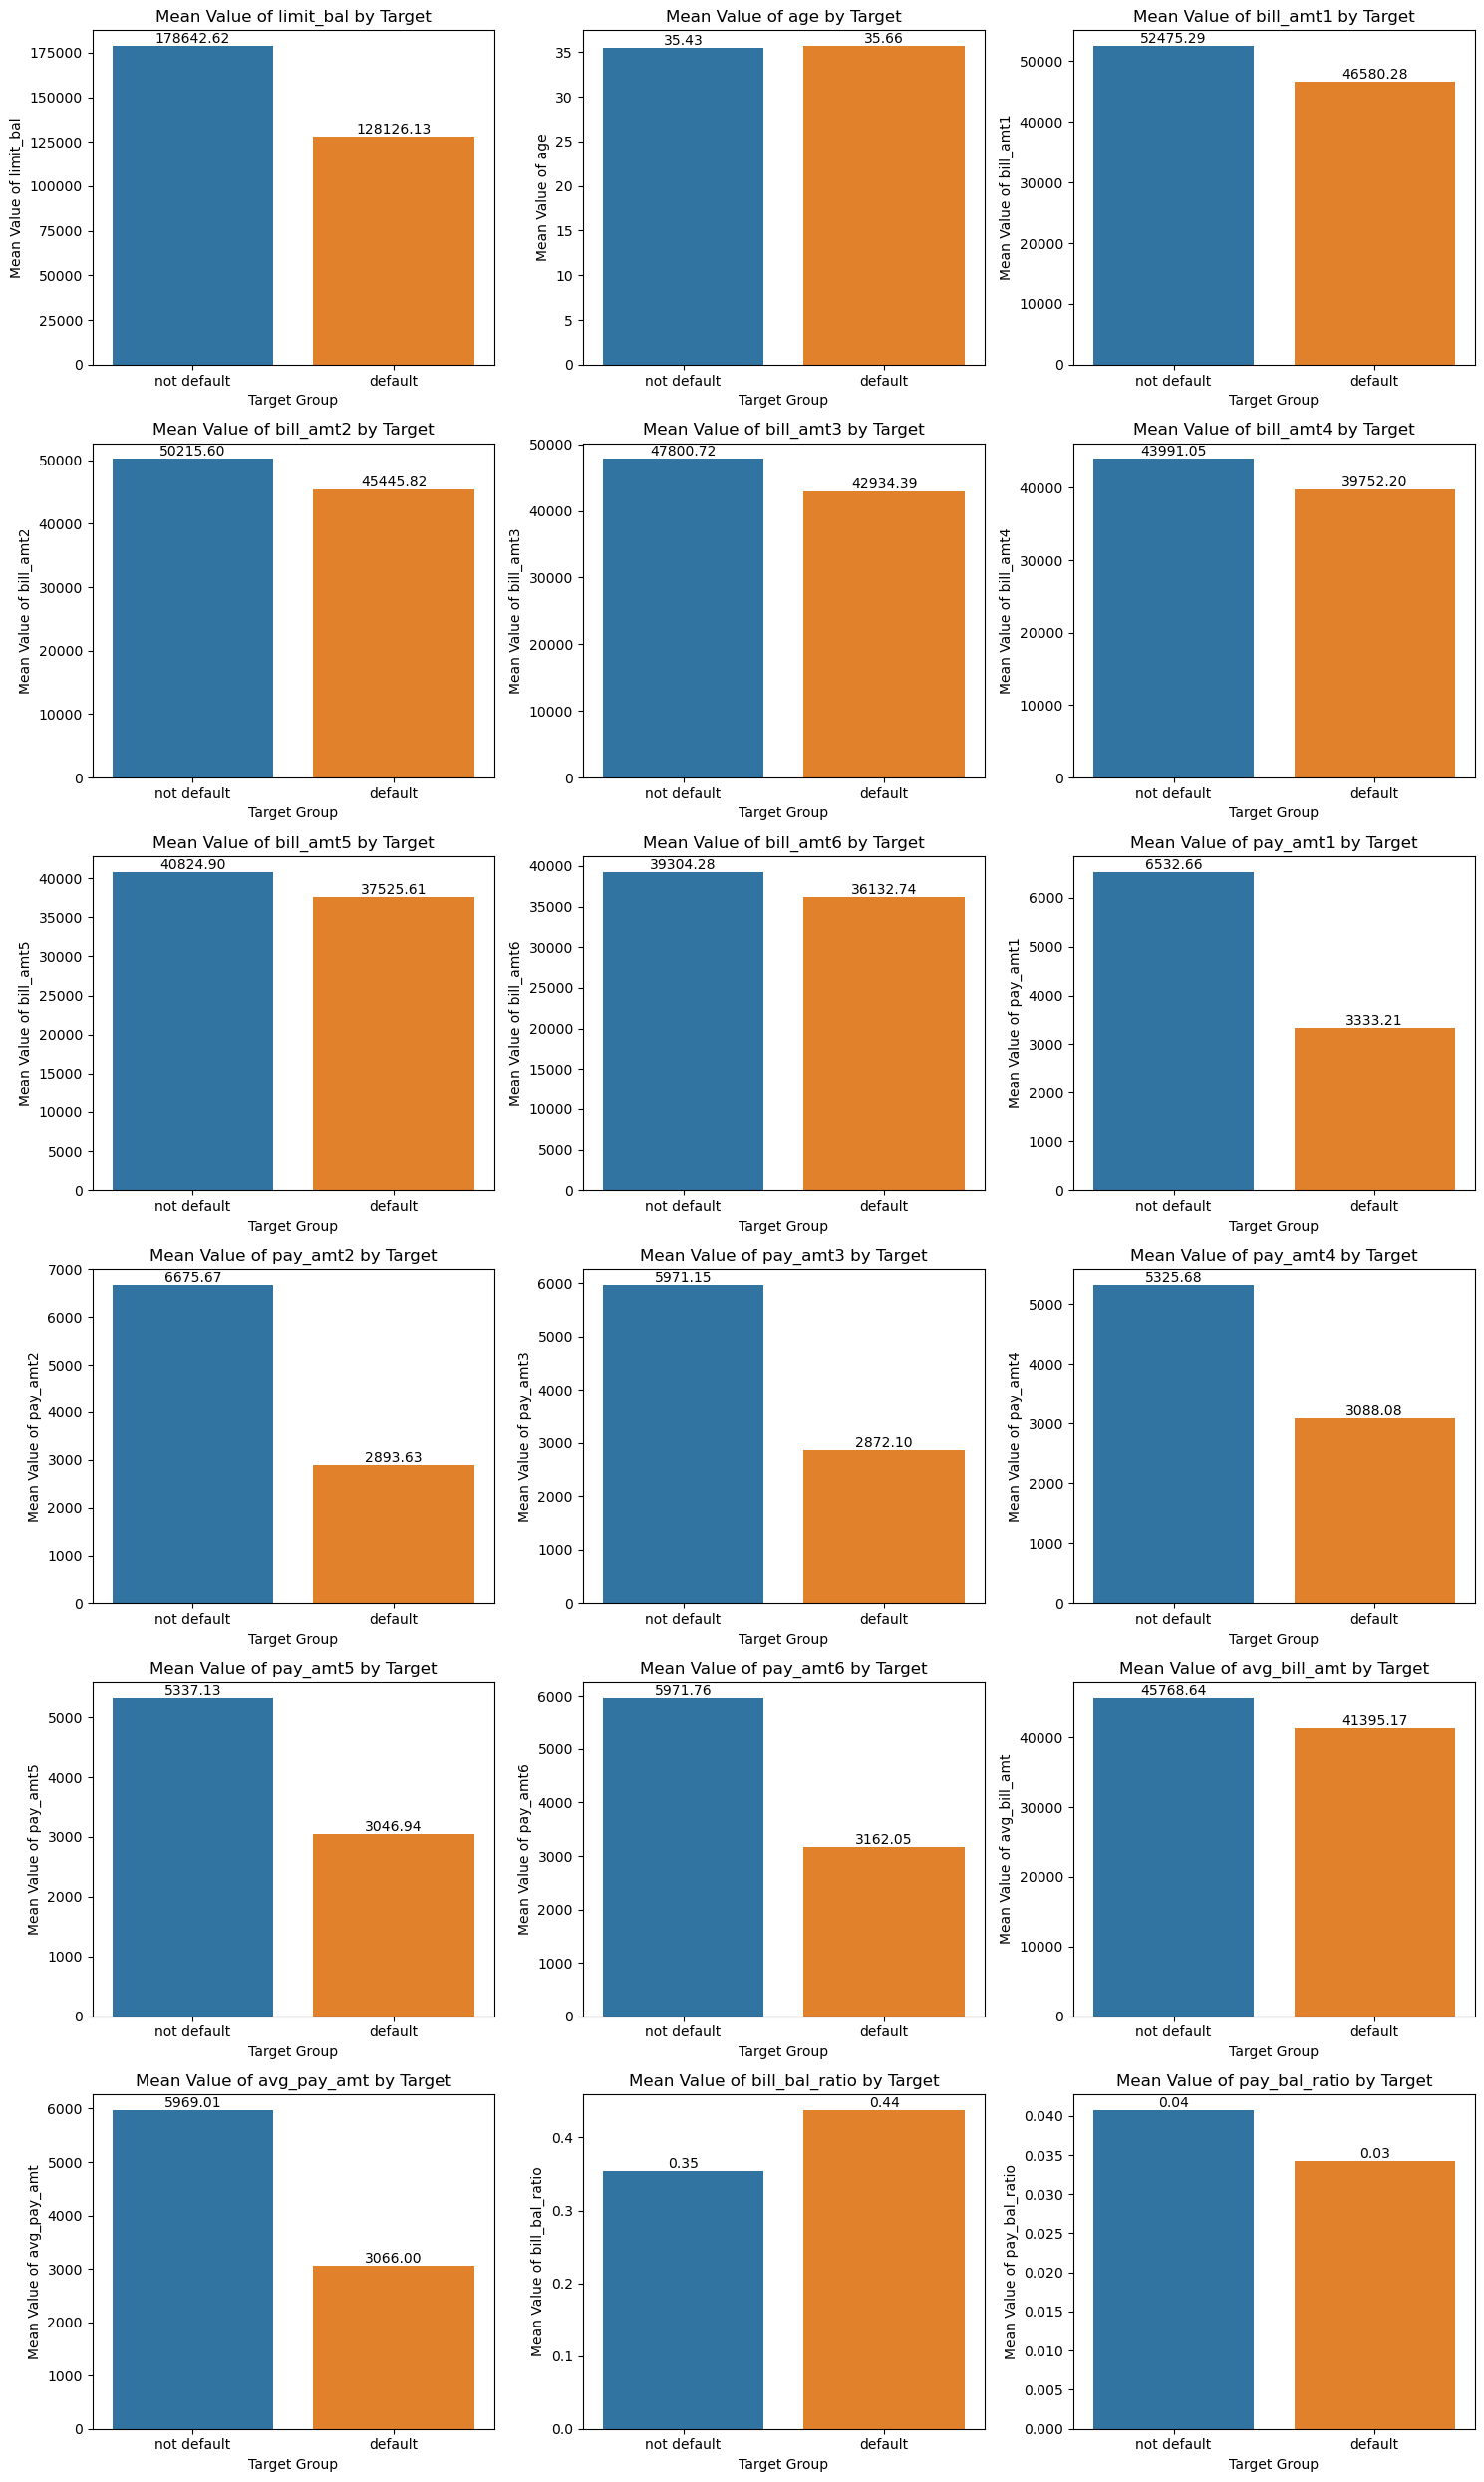

In [11]:
# create a grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))

for i, ax in enumerate(axes.flat):
    if i < 18:
        # split the dataset into two groups based on the target variable
        not_default = X_train[(y_train==0).values]
        default = X_train[(y_train==1).values]

        
        # calculate the mean value of the numerical feature for each group
        not_default_mean = not_default[numerical[i]].mean()
        default_mean = default[numerical[i]].mean()
        
        # create a bar plot with two bars (one for each group) and with the mean values on the y-axis
        ax = sns.barplot(x=['not default','default'], y=[not_default_mean,default_mean], ax=ax)
        
        # add annotation
        for j, v in enumerate([not_default_mean, default_mean]):
            ax.text(j, v, "{:.2f}".format(v), ha='center', va='bottom')
        
        # add labels to the bars and axes
        ax.set_title('Mean Value of {} by Target'.format(numerical[i]))
        ax.set_xlabel('Target Group')
        ax.set_ylabel('Mean Value of {}'.format(numerical[i]))
        
plt.tight_layout()
plt.show()


Insight:
- The mean age is similar between the default and non-default groups.
- The default group has a lower mean pay amount and bill amount compared to the non-default group.

### Stacked Barplot

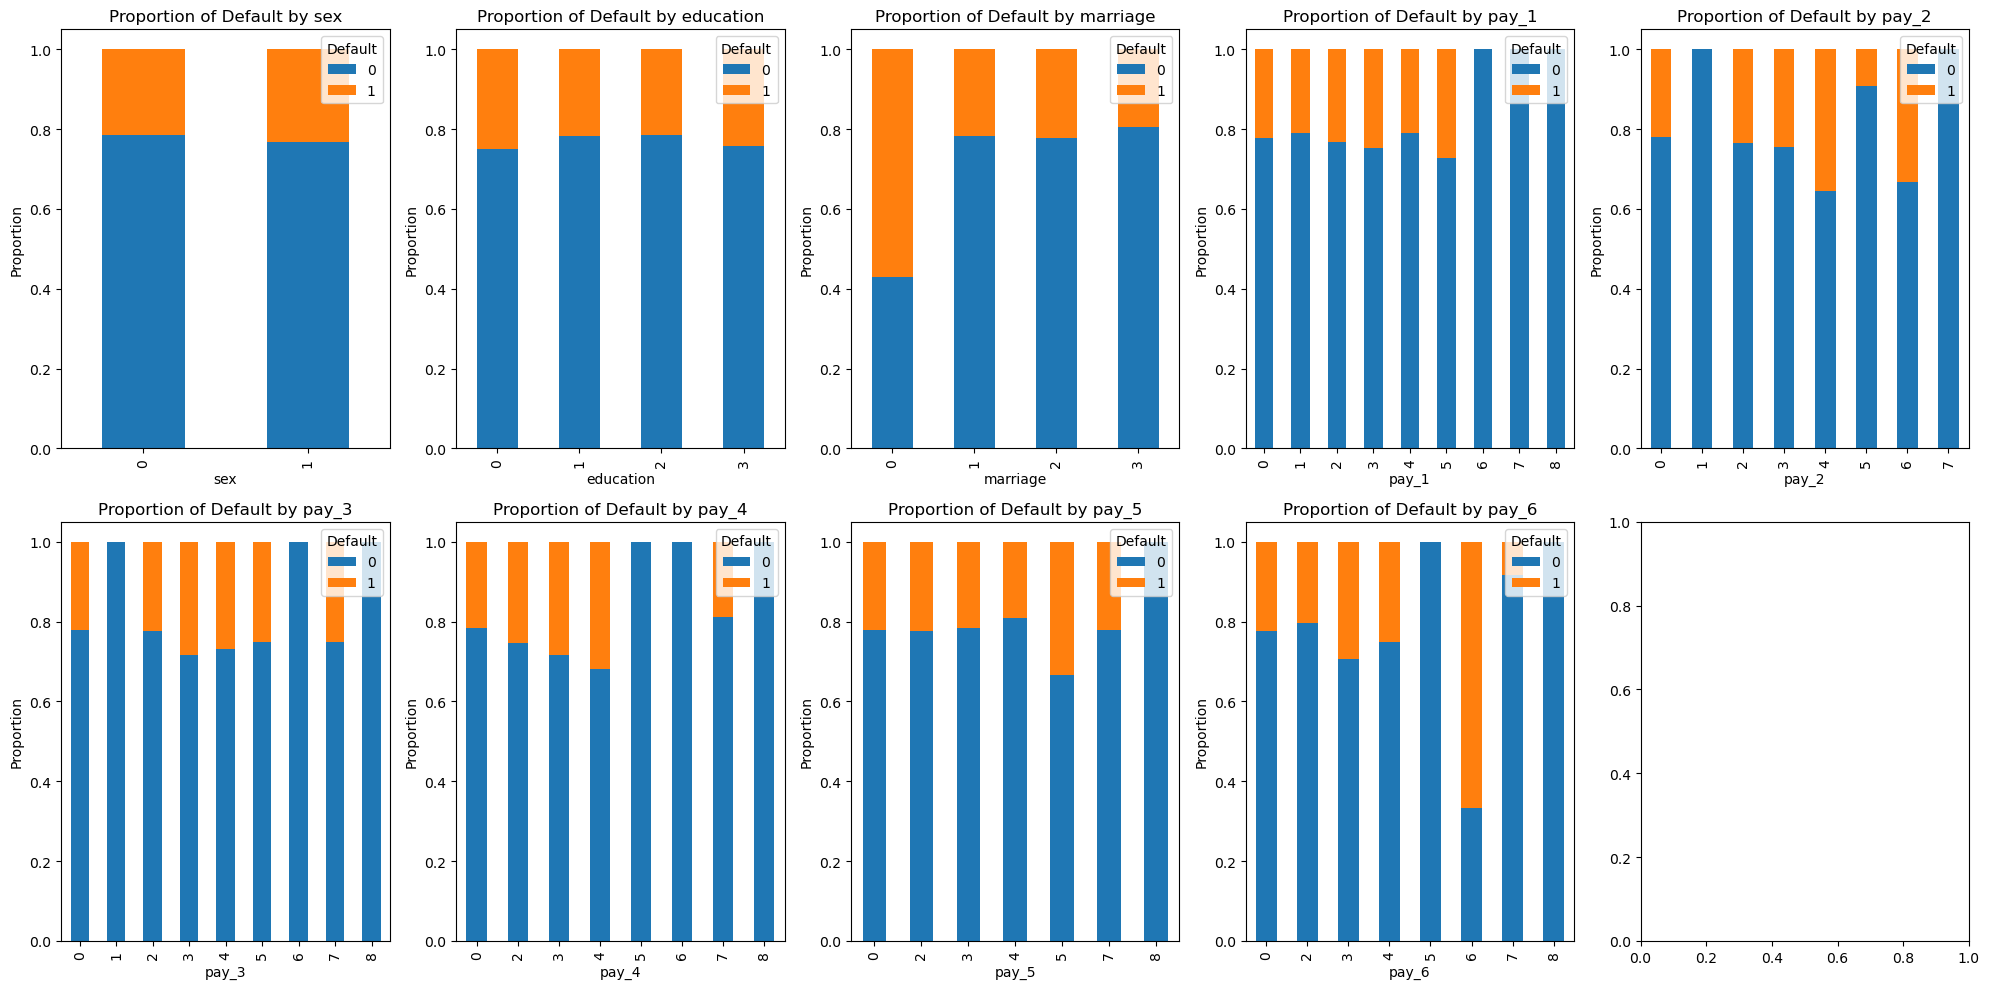

In [12]:
# create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# iterate over the slice and create a stacked bar plot for each column
for i, ax in enumerate(axes.flat):
    if(i<9):
        # create a crosstab of the current column and default status
        ct = pd.crosstab(X_train[categorical[:-1][i]], y_train)

        # normalize the crosstab by dividing by the total number of observations
        ct_norm = ct.div(ct.sum(axis=1), axis=0)

        # create the stacked bar plot
        ct_norm.plot(kind='bar', stacked=True, ax=ax)

        # add labels to the plot
        ax.set_xlabel(categorical[:-1][i])
        ax.set_ylabel('Proportion')
        ax.set_title('Proportion of Default by {}'.format(categorical[:-1][i]))
        ax.legend(title='Default', loc='upper right')

plt.tight_layout()
plt.show()

Insight:
- The proportion of males and females is similar between the default and non-default groups.
- For the education column (with values 0=others, 1=graduate school, 2=university, 3=high school), there is a slight increasing trend in default proportion as the education level decreases, with the highest default proportion observed in the high school category. This suggests that people with lower education levels (such as high school) may have less income and therefore be more likely to default.
- In the marriage column (with values 0=unknown, 1=married, 2=single, 3=divorced), the default proportion is higher for married people compared to single or divorced people. This could be due to the fact that married people may have more financial liabilities compared to single or divorced people.
- Over the past 2 months, it can be observed that individuals who delayed their payment for 7 and 8 months were more likely to default, with approximately half of them defaulting.

### Variance Inflation Factor

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. Variance Inflation Factor is preferred as it can show the correlation of a variable with a group of other variables.

In [13]:
numerical

['limit_bal',
 'age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'avg_bill_amt',
 'avg_pay_amt',
 'bill_bal_ratio',
 'pay_bal_ratio']

As mentioned previously, some of the independent variables are highly correlated with each other, such as the derived column and the bill amount variable. To further investigate this issue, we will conduct a variance inflation factor analysis.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# select only the numeric features to calculate VIF
numeric_features = X_train[numerical]

# create a DataFrame to store the VIF values for each feature
vif_data = pd.DataFrame()

vif_data["feature"] = numeric_features.columns


# calculate VIF for each feature and store the result in the DataFrame
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

# print the VIF values
print(vif_data)

C:\Users\Damian Marvel\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


           feature       VIF
0        limit_bal  5.142848
1              age  6.276149
2        bill_amt1       inf
3        bill_amt2       inf
4        bill_amt3       inf
5        bill_amt4       inf
6        bill_amt5       inf
7        bill_amt6       inf
8         pay_amt1       inf
9         pay_amt2       inf
10        pay_amt3       inf
11        pay_amt4       inf
12        pay_amt5       inf
13        pay_amt6       inf
14    avg_bill_amt       inf
15     avg_pay_amt       inf
16  bill_bal_ratio  5.235107
17   pay_bal_ratio  3.206892


The presence of numerous infinite values in the VIF output suggests that there is high multicollinearity among the independent variables. To address this, we can try removing our derived columns, such as avg_bill_amt and avg_pay_amt.

In [15]:
numerical = ['limit_bal',
 'age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'bill_bal_ratio',
 'pay_bal_ratio']

In [16]:
# select only the numeric features to calculate VIF
numeric_features = X_train[numerical]

# create a DataFrame to store the VIF values for each feature
vif_data = pd.DataFrame()

vif_data["feature"] = numeric_features.columns


# calculate VIF for each feature and store the result in the DataFrame
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

# print the VIF values
print(vif_data)

           feature        VIF
0        limit_bal   5.142848
1              age   6.276149
2        bill_amt1  19.315769
3        bill_amt2  36.427564
4        bill_amt3  31.692517
5        bill_amt4  31.512498
6        bill_amt5  35.506253
7        bill_amt6  19.513929
8         pay_amt1   2.262446
9         pay_amt2   2.153346
10        pay_amt3   2.208774
11        pay_amt4   2.041682
12        pay_amt5   1.994564
13        pay_amt6   1.406115
14  bill_bal_ratio   5.235107
15   pay_bal_ratio   3.206892


After making some improvements, the results have significantly improved. However, the issue of high multicollinearity still remains for the bill amount variables. As a solution, I'm considering using principal component analysis (PCA) on the bill amount variable. But I will do that later since scaling is needed before using pca.

In [17]:
X_train.drop(['avg_bill_amt','avg_pay_amt'],axis=1,inplace=True)
X_val.drop(['avg_bill_amt','avg_pay_amt'],axis=1,inplace=True)
X_test.drop(['avg_bill_amt','avg_pay_amt'],axis=1,inplace=True)

# Feature Engineering

### One Hot Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe = OneHotEncoder(handle_unknown="ignore",drop="first")

In [21]:
ohe_columns = ['marriage','education']

In [22]:
# We will one hot encoding marriage and education
X_train_cat = pd.DataFrame(ohe.fit_transform(X_train[ohe_columns]).toarray(),columns=ohe.get_feature_names_out())
X_val_cat = pd.DataFrame(ohe.transform(X_val[ohe_columns]).toarray(),columns=ohe.get_feature_names_out())
X_test_cat = pd.DataFrame(ohe.transform(X_test[ohe_columns]).toarray(),columns=ohe.get_feature_names_out())

In [23]:
X_train = pd.concat([X_train_cat,X_train.drop(ohe_columns,axis=1)],axis=1)
X_val = pd.concat([X_val_cat,X_val.drop(ohe_columns,axis=1)],axis=1)
X_test = pd.concat([X_test_cat,X_test.drop(ohe_columns,axis=1)],axis=1)

### Scaling

Given the presence of many outliers and skewed data, I plan to use StandardScaler, as it is less sensitive to outliers than MinMaxScaler. Although, RobustScaler could also be used to deal with outliers by removing them, I will not use it since it could lead to information loss.

In [24]:
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X_train[numerical])
scaled_numerical_df = pd.DataFrame(data=scaled_numerical, columns=numerical)

# merge the scaled numerical features to the original data
X_train = pd.concat([X_train.drop(numerical, axis=1), scaled_numerical_df], axis=1)
scaled_numerical = scaler.transform(X_val[numerical])
scaled_numerical_df = pd.DataFrame(data=scaled_numerical, columns=numerical)
X_val = pd.concat([X_val.drop(numerical, axis=1), scaled_numerical_df], axis=1)
scaled_numerical = scaler.transform(X_test[numerical])
scaled_numerical_df = pd.DataFrame(data=scaled_numerical, columns=numerical)
X_test = pd.concat([X_test.drop(numerical, axis=1), scaled_numerical_df], axis=1)

As previously stated, after scaling the numerical data, we aim to perform principal component analysis (PCA) on the bill amount variable in order to decrease the value of the variance inflation factor (VIF).

In [25]:
X_train

,marriage_1,marriage_2,marriage_3,education_1,education_2,education_3,sex,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,avg_default,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,bill_bal_ratio,pay_bal_ratio
0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.000000,0.329245,0.274491,-0.684167,-0.639699,-0.618450,-0.584655,-0.316006,-0.637063,-0.113639,-0.065873,0.016909,1.010008,-0.251606,-0.233049,-0.981932,-0.186575
1,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0.000000,-0.602166,-0.922743,-0.683976,-0.636854,-0.580207,-0.658539,-0.658786,-0.639639,-0.102063,0.050620,-0.241774,-0.279697,-0.261644,-0.258773,-0.990960,-0.261385
2,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0.000000,0.251628,-1.031582,-0.698162,-0.658994,-0.682033,-0.656323,-0.627630,-0.634266,-0.318465,-0.259331,-0.234561,-0.176815,-0.240708,-0.241660,-1.049297,-0.648575
3,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.000000,2.580156,0.165652,-0.598248,-0.687528,-0.676997,-0.653295,-0.625177,-0.546920,-0.299080,-0.244213,-0.223414,-0.153245,0.099618,0.512995,-1.048433,-0.569398
4,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0.000000,-0.369313,1.907083,-0.694193,-0.688430,-0.682179,-0.663002,-0.659763,-0.654454,-0.302575,-0.259998,-0.257402,-0.283375,-0.319367,-0.256943,-1.059790,-0.681892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,0.0,1.0,0.0,0.0,1.0,0.0,0,1,2,0,0,2,2,1.166667,-1.145489,-1.466940,-0.568608,-0.562927,-0.525396,-0.479713,-0.467576,-0.495950,-0.318465,-0.171072,-0.190846,-0.301520,-0.259927,-0.288264,0.437920,-0.002462
12596,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.000000,-0.912636,-0.922743,-0.414966,-0.377299,-0.370642,-0.440321,-0.460499,-0.478322,-0.209254,-0.187879,-0.179207,-0.270344,-0.286345,-0.261356,-0.091566,-0.286932
12597,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0,0,0,0,0,0.166667,0.950186,-0.160866,-0.698162,-0.692528,-0.616144,-0.540362,-0.493892,-0.654454,-0.318465,-0.058848,-0.070630,-0.176815,-0.319367,-0.288264,-1.027291,-0.614890
12598,0.0,1.0,0.0,0.0,1.0,0.0,0,2,0,0,0,0,0,0.333333,-0.835019,-0.813903,-0.642047,-0.609784,-0.571069,-0.534338,-0.496991,-0.463100,-0.209254,-0.171072,-0.207239,-0.201756,-0.220301,-0.207541,-0.685133,-0.207929


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
bill_amt_cols = ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']
principal_components = pca.fit_transform(X_train[bill_amt_cols])
principal_components_df = pd.DataFrame(data=principal_components, columns=['billpca1','billpca2'])
X_train = pd.concat([X_train.drop(bill_amt_cols, axis=1), principal_components_df], axis=1)
principal_components = pca.transform(X_val[bill_amt_cols])
principal_components_df = pd.DataFrame(data=principal_components, columns=['billpca1','billpca2'])
X_val = pd.concat([X_val.drop(bill_amt_cols, axis=1), principal_components_df], axis=1)
principal_components = pca.transform(X_test[bill_amt_cols])
principal_components_df = pd.DataFrame(data=principal_components, columns=['billpca1','billpca2'])
X_test = pd.concat([X_test.drop(bill_amt_cols, axis=1), principal_components_df], axis=1)

In [27]:
numerical = ['limit_bal',
 'age','billpca1','billpca2',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'bill_bal_ratio',
 'pay_bal_ratio']

In [28]:
# select only the numeric features to calculate VIF
numeric_features = X_train[numerical]

# create a DataFrame to store the VIF values for each feature
vif_data = pd.DataFrame()

vif_data["feature"] = numeric_features.columns


# calculate VIF for each feature and store the result in the DataFrame
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

# print the VIF values
print(vif_data)

           feature       VIF
0        limit_bal  2.371105
1              age  1.022619
2         billpca1  2.783515
3         billpca2  1.101763
4         pay_amt1  1.507914
5         pay_amt2  1.427258
6         pay_amt3  1.429972
7         pay_amt4  1.313263
8         pay_amt5  1.203204
9         pay_amt6  1.244741
10  bill_bal_ratio  2.933201
11   pay_bal_ratio  2.177744


Now we got better VIF

### Information Gain

In [29]:
from sklearn.feature_selection import mutual_info_classif

In [30]:
X_train

,marriage_1,marriage_2,marriage_3,education_1,education_2,education_3,sex,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,avg_default,limit_bal,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,bill_bal_ratio,pay_bal_ratio,billpca1,billpca2
0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.000000,0.329245,0.274491,-0.113639,-0.065873,0.016909,1.010008,-0.251606,-0.233049,-0.981932,-0.186575,-1.419101,-0.167552
1,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0.000000,-0.602166,-0.922743,-0.102063,0.050620,-0.241774,-0.279697,-0.261644,-0.258773,-0.990960,-0.261385,-1.574215,0.000407
2,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0.000000,0.251628,-1.031582,-0.318465,-0.259331,-0.234561,-0.176815,-0.240708,-0.241660,-1.049297,-0.648575,-1.615378,-0.050851
3,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.000000,2.580156,0.165652,-0.299080,-0.244213,-0.223414,-0.153245,0.099618,0.512995,-1.048433,-0.569398,-1.547973,-0.056429
4,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0.000000,-0.369313,1.907083,-0.302575,-0.259998,-0.257402,-0.283375,-0.319367,-0.256943,-1.059790,-0.681892,-1.649945,-0.035472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,0.0,1.0,0.0,0.0,1.0,0.0,0,1,2,0,0,2,2,1.166667,-1.145489,-1.466940,-0.318465,-0.171072,-0.190846,-0.301520,-0.259927,-0.288264,0.437920,-0.002462,-1.265084,-0.086507
12596,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.000000,-0.912636,-0.922743,-0.209254,-0.187879,-0.179207,-0.270344,-0.286345,-0.261356,-0.091566,-0.286932,-1.036917,0.082313
12597,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0,0,0,0,0,0.166667,0.950186,-0.160866,-0.318465,-0.058848,-0.070630,-0.176815,-0.319367,-0.288264,-1.027291,-0.614890,-1.506939,-0.119988
12598,0.0,1.0,0.0,0.0,1.0,0.0,0,2,0,0,0,0,0,0.333333,-0.835019,-0.813903,-0.209254,-0.171072,-0.207239,-0.201756,-0.220301,-0.207541,-0.685133,-0.207929,-1.354269,-0.149381


In [31]:
mutual_info=mutual_info_classif(X_train,y_train)

mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

pay_1             0.079715
avg_default       0.071703
pay_2             0.049048
pay_3             0.038390
pay_5             0.034919
pay_4             0.031224
pay_amt1          0.030595
pay_6             0.027008
pay_amt4          0.020018
limit_bal         0.019882
pay_amt5          0.019684
pay_amt2          0.018832
pay_amt3          0.016799
bill_bal_ratio    0.012651
pay_amt6          0.011698
billpca1          0.007760
pay_bal_ratio     0.006949
billpca2          0.005926
education_1       0.002382
sex               0.002235
marriage_1        0.001647
marriage_3        0.000456
age               0.000000
marriage_2        0.000000
education_3       0.000000
education_2       0.000000
dtype: float64

- Sex, education, and marriage have low mutual information
- payment history variable has the highest mutual information followed by pay amount variable

# Handling Imbalanced Dataset

In [32]:
y_train.value_counts()/len(y_train)

0    0.781032
1    0.218968
Name: default, dtype: float64

We have 78-22 target variable so we use smotetomek to handle it

In [33]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [34]:
os=SMOTETomek()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 9841, 1: 2759})
The number of classes after fit Counter({0: 9613, 1: 9613})


# Model

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Given that the data is imbalanced, our analysis will prioritize metrics such as recall, precision, and confusion metrics. However, accurately identifying all individuals who default on their payments is particularly important, hence the focus of our project is on recall.

In [36]:
ensemble = XGBClassifier()
ensemble.fit(X_train_ns,y_train_ns)
y_pred = ensemble.predict(X_train_ns)

In [37]:
def output_result(y,y_pred):
    print('Confusion Matrix')
    print(confusion_matrix(y,y_pred))
    print(f'Accuracy : {accuracy_score(y,y_pred)}')
    print(f'Auc score Train: {roc_auc_score(y,y_pred)}')
    print(classification_report(y,y_pred))

In [38]:
output_result(y_train_ns,y_pred)

Confusion Matrix
[[9407  206]
 [ 713 8900]]
Accuracy : 0.9522001456361178
Auc score Train: 0.9522001456361179
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9613
           1       0.98      0.93      0.95      9613

    accuracy                           0.95     19226
   macro avg       0.95      0.95      0.95     19226
weighted avg       0.95      0.95      0.95     19226



In [39]:
y_pred = ensemble.predict(X_val)
output_result(y_val,y_pred)

Confusion Matrix
[[2952  303]
 [ 555  390]]
Accuracy : 0.7957142857142857
Auc score Train: 0.659805427547363
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3255
           1       0.56      0.41      0.48       945

    accuracy                           0.80      4200
   macro avg       0.70      0.66      0.67      4200
weighted avg       0.78      0.80      0.78      4200



Looking at the precision and recall in training and validation evaluation, the models are overfit so I need to tune some parameters.Since RandomizedSearchCV is faster than GridSearchCV because it randomly selects a subset of the hyperparameter space to explore, whereas GridSearchCV exhaustively searches over all possible combinations of hyperparameters. Therefor I will use RandomizedSearchCV instead of GridSearchCV 

In [40]:
from pprint import pprint

In [41]:
# Setting up a parameter grid for hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 25, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 5, 10, 15, 20, 25, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [42]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [43]:
# Random search of parameters, using 5 fold cross validation,
# search across 50 different combinations
xgboost_random = RandomizedSearchCV(estimator = ensemble, param_distributions = random_grid, n_iter = 10, cv = 5, scoring='recall', verbose=2, random_state=0, n_jobs = -1, error_score='raise')

# Fit the random search model
xgboost_random.fit(X_train_ns, y_train_ns)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[22:08:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.30...
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                        

In [44]:
y_pred = xgboost_random.predict(X_train_ns)
output_result(y_train_ns,y_pred)

Confusion Matrix
[[9610    3]
 [   2 9611]]
Accuracy : 0.999739935504005
Auc score Train: 0.999739935504005
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9613
           1       1.00      1.00      1.00      9613

    accuracy                           1.00     19226
   macro avg       1.00      1.00      1.00     19226
weighted avg       1.00      1.00      1.00     19226



In [45]:
y_pred = xgboost_random.predict(X_val)
output_result(y_val,y_pred)

Confusion Matrix
[[2929  326]
 [ 533  412]]
Accuracy : 0.7954761904761904
Auc score Train: 0.6679126130739034
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3255
           1       0.56      0.44      0.49       945

    accuracy                           0.80      4200
   macro avg       0.70      0.67      0.68      4200
weighted avg       0.78      0.80      0.79      4200



In [46]:
y_pred = xgboost_random.predict(X_test)
output_result(y_test,y_pred)

Confusion Matrix
[[2936  323]
 [ 562  379]]
Accuracy : 0.7892857142857143
Auc score Train: 0.6518264307880833
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3259
           1       0.54      0.40      0.46       941

    accuracy                           0.79      4200
   macro avg       0.69      0.65      0.67      4200
weighted avg       0.77      0.79      0.78      4200



After tuning the parameter using RandomSearchCV, we will combine the train and val set to train with the same parameter we got.

In [47]:
X_full_train = pd.concat([X_train_ns,X_val])
y_full_train = pd.concat([y_train_ns,y_val])

In [48]:
final_model = xgboost_random.best_estimator_.fit(X_full_train,y_full_train)

[22:08:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [49]:
y_pred = final_model.predict(X_test)
output_result(y_test,y_pred)

Confusion Matrix
[[2925  334]
 [ 574  367]]
Accuracy : 0.7838095238095238
Auc score Train: 0.6437626010077873
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3259
           1       0.52      0.39      0.45       941

    accuracy                           0.78      4200
   macro avg       0.68      0.64      0.66      4200
weighted avg       0.77      0.78      0.77      4200



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

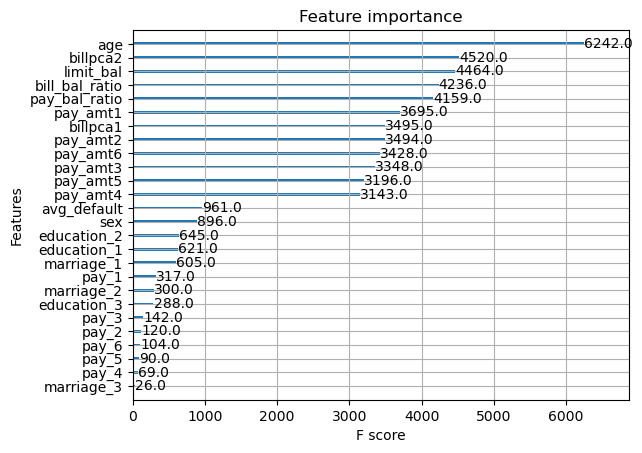

In [50]:
booster = final_model.get_booster()
xgb.plot_importance(booster)

The feature importance analysis showed that the age variable had the highest importance in the model, followed by limit_bal and billpca2. This is in contrast to the mutual information analysis where payment history was one of highest in mutual information.

Mutual information and feature importance plot measure feature importance in different ways, which can lead to differences in their results. Mutual information measures the amount of information that one feature provides about the target variable, taking into account the joint distribution between them. It is based on a non-parametric method and does not make any assumptions about the underlying data distribution. On the other hand, feature importance plot in XGBoost is based on decision tree structure and how much each feature contributes to the splits in the tree. It uses impurity reduction to evaluate feature importance and does not take into account the relationship between features.

Therefore, it is possible to see a significant difference in feature importance ranking between mutual information and feature importance plot, especially if there are strong correlations between the features or non-linear relationships between the features and the target variable.

Instead classifying the credit card as default and not default, we also can classify it to 5 different category. It will be more interesting since we can treat this 5 category differently. Classifying credit into 5 categories can also be a good approach, as it allows for more fine-grained analysis and can provide more insights into the different levels of credit risk. We will classify using FICO score

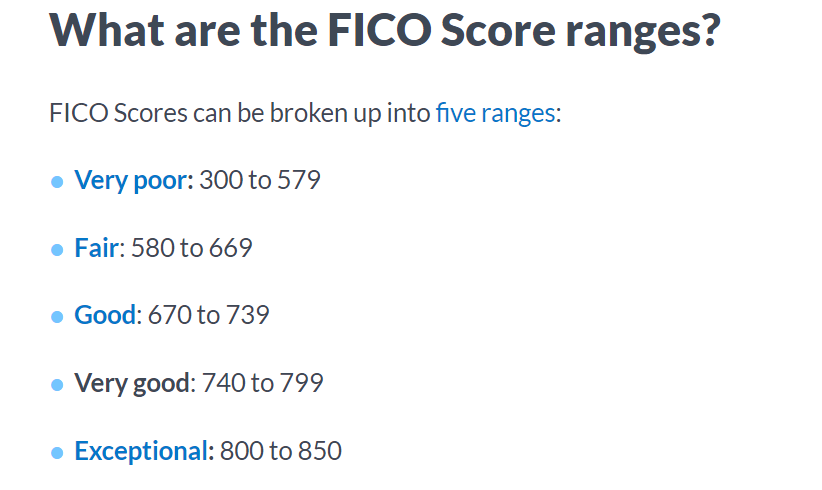

In [51]:
credit_class =  xgboost_random.predict_proba(X_test)[:,0]
credit_class = credit_class*550+300

<AxesSubplot: ylabel='Count'>

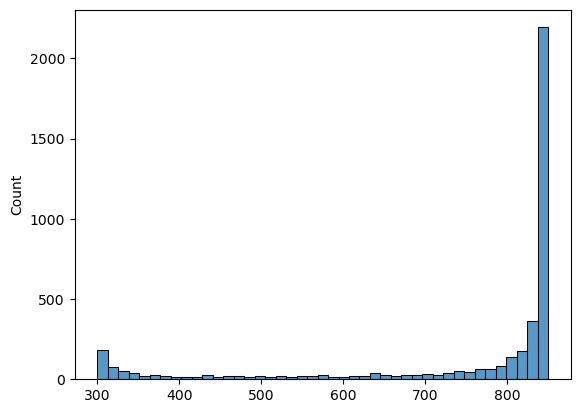

In [52]:
sns.histplot(credit_class)

In [53]:
def credit_classifier(credit_class):
    if credit_class>800:
        return 'Exceptional'
    elif credit_class>740:
        return 'Very Good'
    elif credit_class>670:
        return 'Good'
    elif credit_class>580:
        return 'Fair'
    else:
        return 'Very Bad'

In [54]:
pd.Series(credit_class).apply(credit_classifier).value_counts()

Exceptional    2864
Very Bad        706
Very Good       297
Good            175
Fair            158
dtype: int64